# Part IV: Perform Machine Learning
After collecting data (Part I), feature engineering (Part II), and data visualization + a bit of cleaning (Part III), it's time to train models and get this party started.

Generally, the machine learning process has five parts:
1. <strong>Split data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import models from sklearn and instantiate them (assign model object to a variable)
3. <strong>Model fitting</strong>
<br>
Fit training data into the model and train 
4. <strong>Model prediction</strong>
<br>
Make a set of predictions using test data, and
5. <strong>Model assessment</strong>
<br>
Compare predictions with ground truth in test data


### Step 1: Import libraries
Used models from sklearn - a popular machine learning library.

Import the following:
1. pandas as pd
2. matplotlib.pyplot as plt
3. seaborn as sns
4. numpy as np

In [1]:
# Step 1: Import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Read cleaned CSV from Part III
Read the CSV from Part III into a DataFrame. 

In [2]:
# Step 2: Read CSV
data = pd.read_csv('Cleaned_DataFrame.csv')
display(data)

,time,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_8
0,2019-01-01 00:00:00,5887,1,0,0,167,979,81,409,3506,678,67
1,2019-01-01 00:05:00,4001,1,5,0,102,496,39,251,2589,471,53
2,2019-01-01 00:10:00,5981,1,10,0,157,1035,69,417,3546,680,77
3,2019-01-01 00:15:00,5461,1,15,0,158,920,68,375,3225,654,61
4,2019-01-01 00:20:00,5003,1,20,0,136,900,62,358,2898,596,53
...,...,...,...,...,...,...,...,...,...,...,...,...
8576,2019-01-30 23:40:00,5782,5,40,23,233,1301,79,585,2591,986,7
8577,2019-01-30 23:45:00,5843,5,45,23,220,1314,78,612,2645,961,13
8578,2019-01-30 23:50:00,5825,5,50,23,214,1269,80,605,2684,960,13
8579,2019-01-30 23:55:00,5783,5,55,23,211,1228,88,590,2702,950,13


### Step 3: Prepare independent and dependent variables
At this stage, machine learning is used to predict the taxi availability in sectors 1-8.

From the loaded CSV, only these features are used:
1. day_of_week
2. minute
3. hour

Declare a variable and store the DataFrame containing these columns only.

And prepare these dependent variables separately:
1. sector_1
2. sector_2
3. sector_3
4. sector_4
5. sector_5
6. sector_6
7. sector_8

Declare seven separate variables, and each variable contains one column's values.

In [3]:
# Step 3: Prepare the independent and dependent variables. 
X  = data.iloc[:, 2:5]
y1 = data.iloc[:, -7]
y2 = data.iloc[:, -6]
y3 = data.iloc[:, -5]
y4 = data.iloc[:, -4]
y5 = data.iloc[:, -3]
y6 = data.iloc[:, -2]
y8 = data.iloc[:, -1]

print (X)
print (y1)
print (y2)
print (y3)
print (y4)
print (y5)
print (y6)
print (y8)

      day_of_week  minute  hour
0               1       0     0
1               1       5     0
2               1      10     0
3               1      15     0
4               1      20     0
...           ...     ...   ...
8576            5      40    23
8577            5      45    23
8578            5      50    23
8579            5      55    23
8580            5       0     0

[8581 rows x 3 columns]
0       167
1       102
2       157
3       158
4       136
       ... 
8576    233
8577    220
8578    214
8579    211
8580    214
Name: sector_1, Length: 8581, dtype: int64
0        979
1        496
2       1035
3        920
4        900
        ... 
8576    1301
8577    1314
8578    1269
8579    1228
8580    1203
Name: sector_2, Length: 8581, dtype: int64
0       81
1       39
2       69
3       68
4       62
        ..
8576    79
8577    78
8578    80
8579    88
8580    90
Name: sector_3, Length: 8581, dtype: int64
0       409
1       251
2       417
3       375
4       358
      

### Step 4: Import machine learning libraries
Time to import other libraries. 

Import the following libraries and methods:
1. train_test_split - sklearn.model_selection
2. DummyRegressor - sklearn.dummy
3. LinearRegression - sklearn.linear_model
4. DecisionTreeRegressor - sklearn.tree
5. RandomForestRegressor - sklearn.ensemble
6. ExtraTreesRegressor - sklearn.ensemble
7. GradientBoostingRegressor - sklearn.ensemble
8. AdaBoostRegressor - sklearn.ensemble
9. KNeighborsRegressor - sklearn.neighbors
10. mean_squared_error - sklearn.metrics

In [4]:
# Step 4: Import the libraries needed
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

### Step 5: Split indepedent and dependent variables into train and test sets
Used a 80/20 split for train and test set respectively, using the train_test_split function.

For ease, try splitting independent variables and the <strong>sector_1</strong> first and use that for the rest of the training.

### Sector 1

In [5]:
# Step 5: Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2, random_state = 20)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(6864, 3) (6864,)
(1717, 3) (1717,)


### Step 6: Train machine learning model
Once split data, machine learning begins. 

This is what are needed to be done:
1. Start with a model
2. Declare a variable, and store model in it 
3. Fit training data into the instantiated model
4. Declare a variable that contains predictions from the model trained, using the train dataset (X_test)

Start with DummyRegressor to establish a baseline for predictions. 

In [6]:
# Step 6a: Declare a variable to store the model
# Dummy Regressor
dummy_reg = DummyRegressor()

# Step 6b: Fit train dataset
dummy_reg.fit(x_train,y_train)

# Step 6c: Declare a variable and store predictions made with the model using X test data
dummy_reg_y_predict = dummy_reg.predict(x_test)
dummy_reg_y_predict

array([158.06555944, 158.06555944, 158.06555944, ..., 158.06555944,
       158.06555944, 158.06555944])

### Step 7: Repeat Step 6 with other models 
After DummyRegressor, give the rest a try.

Use different variables to compare their performances later.

In [7]:
# Step 7: Repeat Step 8 with other models
# Linear Regressor
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

lin_reg_y_predict = lin_reg.predict(x_test)
lin_reg_y_predict

array([163.51615921, 149.90690749, 161.89948127, ..., 162.40295086,
       163.79187729, 145.50360614])

In [8]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()

dt_reg.fit(x_train,y_train)

dt_reg_y_predict = dt_reg.predict(x_test)
dt_reg_y_predict

array([201.6       , 181.66666667, 154.66666667, ..., 198.8       ,
        94.        , 195.        ])

In [9]:
# Random Forest Regressor
rf_reg = RandomForestRegressor()

rf_reg.fit(x_train,y_train)

rf_reg_y_predict = rf_reg.predict(x_test)
rf_reg_y_predict

array([200.55504834, 182.26095391, 154.85708983, ..., 199.02524603,
        93.84619444, 196.84611905])

In [10]:
# Extra Trees Regressor
et_reg = ExtraTreesRegressor()

et_reg.fit(x_train,y_train)

et_reg_y_predict = et_reg.predict(x_test)
et_reg_y_predict

array([201.6       , 181.66666667, 154.66666667, ..., 198.8       ,
        94.        , 195.        ])

In [11]:
# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()

gb_reg.fit(x_train,y_train)

gb_reg_y_predict = gb_reg.predict(x_test)
gb_reg_y_predict

array([197.5829285 , 178.23125734, 164.90813421, ..., 195.86931342,
       118.97774801, 194.88690867])

In [12]:
# AdaBoostRegressor
ab_reg = AdaBoostRegressor()

ab_reg.fit(x_train,y_train)

ab_reg_y_predict = ab_reg.predict(x_test)
ab_reg_y_predict

array([192.9119171 , 180.8972332 , 152.95746606, ..., 191.33861386,
       148.19461698, 180.8972332 ])

In [13]:
# KNeighbors Regressor
knn_reg = KNeighborsRegressor()

knn_reg.fit(x_train,y_train)

knn_reg_y_predict = knn_reg.predict(x_test)
knn_reg_y_predict

array([201.6, 180. , 149.2, ..., 198.8,  94.2, 186.4])

### Step 8: Assess model performance
Used two ways to assess model.

1. Scatter plot comparing the actual values of the dependent variable and the predictions
2. The root mean-squared-error (RMSE) score

Do this for all of the models to compare how well they predict taxi availability. Ideally, data points should lie on a line where y = x, i.e. predictions are exactly the same as actual values.

In [14]:
# Step 8a: Print the RMSE between the y test and the prediction
import math

dummy_reg_MSE  = mean_squared_error(y_test, dummy_reg_y_predict)
dummy_reg_RMSE = math.sqrt(dummy_reg_MSE)
print("Root Mean Square Error of Dummy Regressor:\n")
print(dummy_reg_RMSE, '\n')

lin_reg_MSE  = mean_squared_error(y_test, lin_reg_y_predict)
lin_reg_RMSE = math.sqrt(lin_reg_MSE)
print("Root Mean Square Error of Linear Regressor:\n")
print(lin_reg_RMSE, '\n')

dt_reg_MSE  = mean_squared_error(y_test, dt_reg_y_predict)
dt_reg_RMSE = math.sqrt(dt_reg_MSE)
print("Root Mean Square Error of Decision Tree Regressor:\n")
print(dt_reg_RMSE, '\n')

rf_reg_MSE  = mean_squared_error(y_test, rf_reg_y_predict)
rf_reg_RMSE = math.sqrt(rf_reg_MSE)
print("Root Mean Square Error of Random Forest Regressor:\n")
print(rf_reg_RMSE, '\n')

et_reg_MSE  = mean_squared_error(y_test, et_reg_y_predict)
et_reg_RMSE = math.sqrt(et_reg_MSE)
print("Root Mean Square Error of Extra Tree Regressor:\n")
print(et_reg_RMSE, '\n')

gb_reg_MSE  = mean_squared_error(y_test, gb_reg_y_predict)
gb_reg_RMSE = math.sqrt(gb_reg_MSE)
print("Root Mean Square Error of Gradient Boosting Regressor:\n")
print(gb_reg_RMSE, '\n')

ab_reg_MSE  = mean_squared_error(y_test, ab_reg_y_predict)
ab_reg_RMSE = math.sqrt(ab_reg_MSE)
print("Root Mean Square Error of AdaBoost Regressor:\n")
print(ab_reg_RMSE, '\n')

knn_reg_MSE  = mean_squared_error(y_test, knn_reg_y_predict)
knn_reg_RMSE = math.sqrt(knn_reg_MSE)
print("Root Mean Square Error of KNeighbors Regressor:\n")
print(knn_reg_RMSE, '\n')

Root Mean Square Error of Dummy Regressor:

47.09632473733566 

Root Mean Square Error of Linear Regressor:

46.640794759365676 

Root Mean Square Error of Decision Tree Regressor:

31.0212444714098 

Root Mean Square Error of Random Forest Regressor:

30.833911630347128 

Root Mean Square Error of Extra Tree Regressor:

31.005846400585938 

Root Mean Square Error of Gradient Boosting Regressor:

27.39949149242339 

Root Mean Square Error of AdaBoost Regressor:

34.81367716610647 

Root Mean Square Error of KNeighbors Regressor:

30.818972818938075 



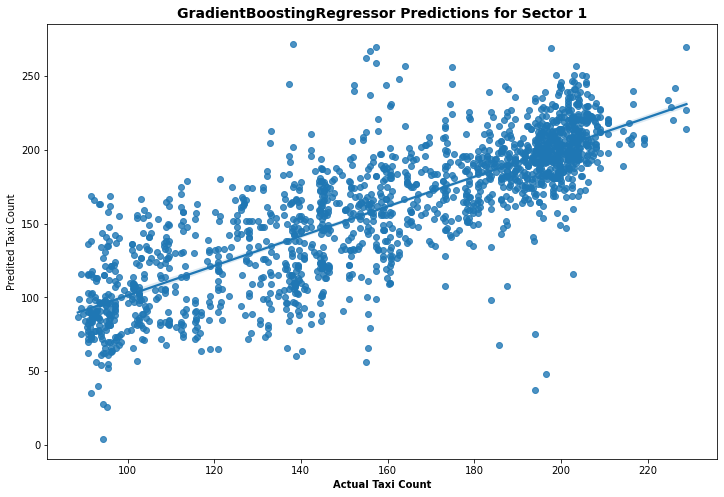

In [15]:
# Step 8b: Plot a scatter plot test dependent variables vs predictions
plt.figure(figsize = (12, 8))
sns.regplot(y=y_test,
            x=gb_reg_y_predict)
plt.title("GradientBoostingRegressor Predictions for Sector 1", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Actual Taxi Count", weight = "bold")
plt.ylabel("Predited Taxi Count")
plt.show()

### Step 9: Assess feature importance
Based on analysis for feature importance, the most important features in predicting model success are as follows:

Features 0, 1 and 2 refer to day of week, minute and hour respectively.

Day of Week: 8.52%
<br>
Minute: 1.91%
<br>
Hour: 89.58%
<br>

Feature: 0, Score: 0.08518
Feature: 1, Score: 0.01906
Feature: 2, Score: 0.89576


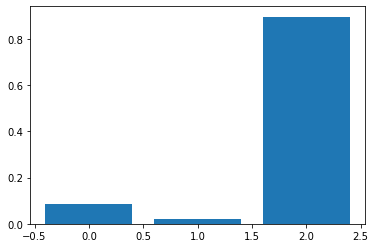

In [16]:
# Step 9: Feature Importance
# Get importance
importance = gb_reg.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Repeat Step 5 - 8 with the other sector data
After done with 'sector_1', give other sectors' data a try to see which model does best in predicting the taxi availability for all sectors.

### Sector 2

In [17]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y2, test_size = 0.2, random_state = 20)

# Dummy Regressor
dummy_reg = DummyRegressor()
dummy_reg.fit(x_train,y_train)
dummy_reg_y_predict = dummy_reg.predict(x_test)

# Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg_y_predict = lin_reg.predict(x_test)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_reg_y_predict = dt_reg.predict(x_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
rf_reg_y_predict = rf_reg.predict(x_test)

# Extra Trees Regressor
et_reg = ExtraTreesRegressor()
et_reg.fit(x_train,y_train)
et_reg_y_predict = et_reg.predict(x_test)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train,y_train)
gb_reg_y_predict = gb_reg.predict(x_test)

# AdaBoostRegressor
ab_reg = AdaBoostRegressor()
ab_reg.fit(x_train,y_train)
ab_reg_y_predict = ab_reg.predict(x_test)

# KNeighbors Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)
knn_reg_y_predict = knn_reg.predict(x_test)

In [18]:
# Print the RMSE between the y test and the prediction
dummy_reg_MSE  = mean_squared_error(y_test, dummy_reg_y_predict)
dummy_reg_RMSE = math.sqrt(dummy_reg_MSE)
print("Root Mean Square Error of Dummy Regressor:\n")
print(dummy_reg_RMSE, '\n')

lin_reg_MSE  = mean_squared_error(y_test, lin_reg_y_predict)
lin_reg_RMSE = math.sqrt(lin_reg_MSE)
print("Root Mean Square Error of Linear Regressor:\n")
print(lin_reg_RMSE, '\n')

dt_reg_MSE  = mean_squared_error(y_test, dt_reg_y_predict)
dt_reg_RMSE = math.sqrt(dt_reg_MSE)
print("Root Mean Square Error of Decision Tree Regressor:\n")
print(dt_reg_RMSE, '\n')

rf_reg_MSE  = mean_squared_error(y_test, rf_reg_y_predict)
rf_reg_RMSE = math.sqrt(rf_reg_MSE)
print("Root Mean Square Error of Random Forest Regressor:\n")
print(rf_reg_RMSE, '\n')

et_reg_MSE  = mean_squared_error(y_test, et_reg_y_predict)
et_reg_RMSE = math.sqrt(et_reg_MSE)
print("Root Mean Square Error of Extra Tree Regressor:\n")
print(et_reg_RMSE, '\n')

gb_reg_MSE  = mean_squared_error(y_test, gb_reg_y_predict)
gb_reg_RMSE = math.sqrt(gb_reg_MSE)
print("Root Mean Square Error of Gradient Boosting Regressor:\n")
print(gb_reg_RMSE, '\n')

ab_reg_MSE  = mean_squared_error(y_test, ab_reg_y_predict)
ab_reg_RMSE = math.sqrt(ab_reg_MSE)
print("Root Mean Square Error of AdaBoost Regressor:\n")
print(ab_reg_RMSE, '\n')

knn_reg_MSE  = mean_squared_error(y_test, knn_reg_y_predict)
knn_reg_RMSE = math.sqrt(knn_reg_MSE)
print("Root Mean Square Error of KNeighbors Regressor:\n")
print(knn_reg_RMSE, '\n')

Root Mean Square Error of Dummy Regressor:

225.08947921014197 

Root Mean Square Error of Linear Regressor:

224.34953670030978 

Root Mean Square Error of Decision Tree Regressor:

133.8639315999452 

Root Mean Square Error of Random Forest Regressor:

132.90407793825676 

Root Mean Square Error of Extra Tree Regressor:

133.86082418970324 

Root Mean Square Error of Gradient Boosting Regressor:

118.56708196310198 

Root Mean Square Error of AdaBoost Regressor:

168.10912814783327 

Root Mean Square Error of KNeighbors Regressor:

133.59868198304312 



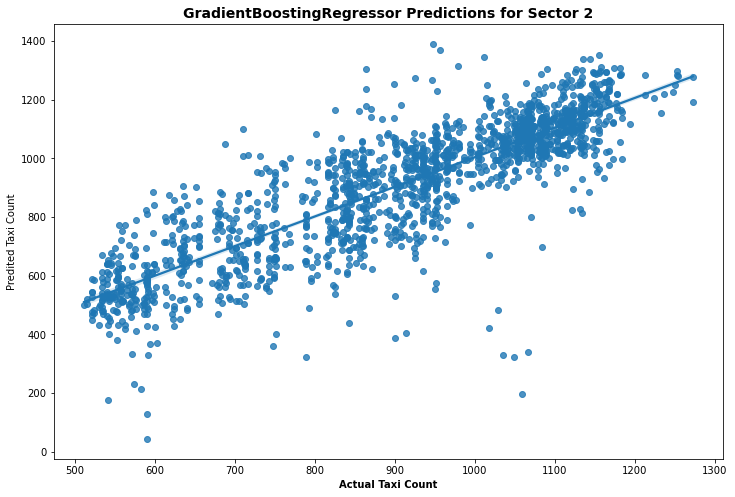

In [19]:
# Plot a scatter plot test dependent variables vs predictions
plt.figure(figsize = (12, 8))
sns.regplot(y=y_test,
            x=gb_reg_y_predict)
plt.title("GradientBoostingRegressor Predictions for Sector 2", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Actual Taxi Count", weight = "bold")
plt.ylabel("Predited Taxi Count")
plt.show()

Feature: 0, Score: 0.05694
Feature: 1, Score: 0.03122
Feature: 2, Score: 0.91184


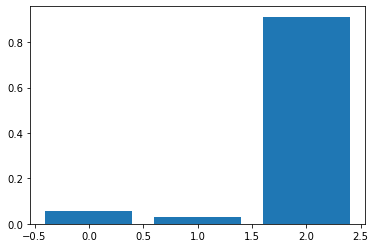

In [20]:
# Get importance
importance = gb_reg.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Sector 3

In [21]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y3, test_size = 0.2, random_state = 20)

# Dummy Regressor
dummy_reg = DummyRegressor()
dummy_reg.fit(x_train,y_train)
dummy_reg_y_predict = dummy_reg.predict(x_test)

# Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg_y_predict = lin_reg.predict(x_test)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_reg_y_predict = dt_reg.predict(x_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
rf_reg_y_predict = rf_reg.predict(x_test)

# Extra Trees Regressor
et_reg = ExtraTreesRegressor()
et_reg.fit(x_train,y_train)
et_reg_y_predict = et_reg.predict(x_test)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train,y_train)
gb_reg_y_predict = gb_reg.predict(x_test)

# AdaBoostRegressor
ab_reg = AdaBoostRegressor()
ab_reg.fit(x_train,y_train)
ab_reg_y_predict = ab_reg.predict(x_test)

# KNeighbors Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)
knn_reg_y_predict = knn_reg.predict(x_test)

In [22]:
# Print the RMSE between the y test and the prediction
dummy_reg_MSE  = mean_squared_error(y_test, dummy_reg_y_predict)
dummy_reg_RMSE = math.sqrt(dummy_reg_MSE)
print("Root Mean Square Error of Dummy Regressor:\n")
print(dummy_reg_RMSE, '\n')

lin_reg_MSE  = mean_squared_error(y_test, lin_reg_y_predict)
lin_reg_RMSE = math.sqrt(lin_reg_MSE)
print("Root Mean Square Error of Linear Regressor:\n")
print(lin_reg_RMSE, '\n')

dt_reg_MSE  = mean_squared_error(y_test, dt_reg_y_predict)
dt_reg_RMSE = math.sqrt(dt_reg_MSE)
print("Root Mean Square Error of Decision Tree Regressor:\n")
print(dt_reg_RMSE, '\n')

rf_reg_MSE  = mean_squared_error(y_test, rf_reg_y_predict)
rf_reg_RMSE = math.sqrt(rf_reg_MSE)
print("Root Mean Square Error of Random Forest Regressor:\n")
print(rf_reg_RMSE, '\n')

et_reg_MSE  = mean_squared_error(y_test, et_reg_y_predict)
et_reg_RMSE = math.sqrt(et_reg_MSE)
print("Root Mean Square Error of Extra Tree Regressor:\n")
print(et_reg_RMSE, '\n')

gb_reg_MSE  = mean_squared_error(y_test, gb_reg_y_predict)
gb_reg_RMSE = math.sqrt(gb_reg_MSE)
print("Root Mean Square Error of Gradient Boosting Regressor:\n")
print(gb_reg_RMSE, '\n')

ab_reg_MSE  = mean_squared_error(y_test, ab_reg_y_predict)
ab_reg_RMSE = math.sqrt(ab_reg_MSE)
print("Root Mean Square Error of AdaBoost Regressor:\n")
print(ab_reg_RMSE, '\n')

knn_reg_MSE  = mean_squared_error(y_test, knn_reg_y_predict)
knn_reg_RMSE = math.sqrt(knn_reg_MSE)
print("Root Mean Square Error of KNeighbors Regressor:\n")
print(knn_reg_RMSE, '\n')

Root Mean Square Error of Dummy Regressor:

18.396329448500502 

Root Mean Square Error of Linear Regressor:

18.311769581521563 

Root Mean Square Error of Decision Tree Regressor:

16.640965754656612 

Root Mean Square Error of Random Forest Regressor:

16.5255456196155 

Root Mean Square Error of Extra Tree Regressor:

16.638695445914564 

Root Mean Square Error of Gradient Boosting Regressor:

14.626182928124853 

Root Mean Square Error of AdaBoost Regressor:

15.62501709163789 

Root Mean Square Error of KNeighbors Regressor:

16.330894789814582 



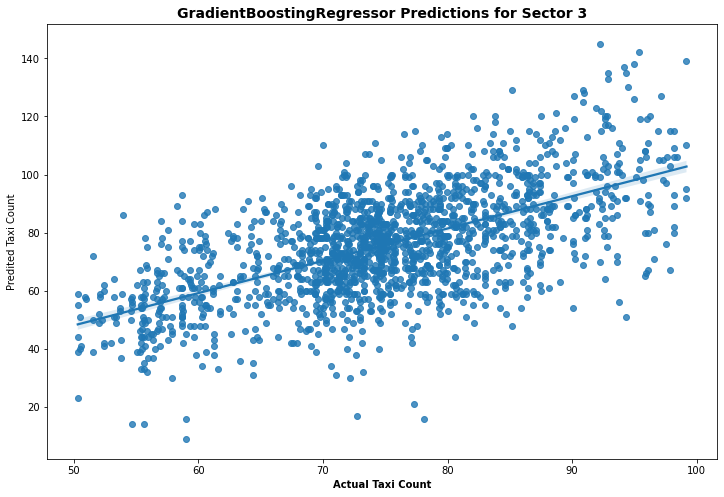

In [23]:
# Plot a scatter plot test dependent variables vs predictions
plt.figure(figsize = (12, 8))
sns.regplot(y=y_test,
            x=gb_reg_y_predict)
plt.title("GradientBoostingRegressor Predictions for Sector 3", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Actual Taxi Count", weight = "bold")
plt.ylabel("Predited Taxi Count")
plt.show()

Feature: 0, Score: 0.06574
Feature: 1, Score: 0.03568
Feature: 2, Score: 0.89859


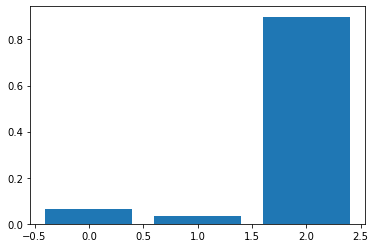

In [24]:
# Get importance
importance = gb_reg.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Sector 4

In [25]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y4, test_size = 0.2, random_state = 20)

# Dummy Regressor
dummy_reg = DummyRegressor()
dummy_reg.fit(x_train,y_train)
dummy_reg_y_predict = dummy_reg.predict(x_test)

# Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg_y_predict = lin_reg.predict(x_test)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_reg_y_predict = dt_reg.predict(x_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
rf_reg_y_predict = rf_reg.predict(x_test)

# Extra Trees Regressor
et_reg = ExtraTreesRegressor()
et_reg.fit(x_train,y_train)
et_reg_y_predict = et_reg.predict(x_test)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train,y_train)
gb_reg_y_predict = gb_reg.predict(x_test)

# AdaBoostRegressor
ab_reg = AdaBoostRegressor()
ab_reg.fit(x_train,y_train)
ab_reg_y_predict = ab_reg.predict(x_test)

# KNeighbors Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)
knn_reg_y_predict = knn_reg.predict(x_test)

In [26]:
# Print the RMSE between the y test and the prediction
dummy_reg_MSE  = mean_squared_error(y_test, dummy_reg_y_predict)
dummy_reg_RMSE = math.sqrt(dummy_reg_MSE)
print("Root Mean Square Error of Dummy Regressor:\n")
print(dummy_reg_RMSE, '\n')

lin_reg_MSE  = mean_squared_error(y_test, lin_reg_y_predict)
lin_reg_RMSE = math.sqrt(lin_reg_MSE)
print("Root Mean Square Error of Linear Regressor:\n")
print(lin_reg_RMSE, '\n')

dt_reg_MSE  = mean_squared_error(y_test, dt_reg_y_predict)
dt_reg_RMSE = math.sqrt(dt_reg_MSE)
print("Root Mean Square Error of Decision Tree Regressor:\n")
print(dt_reg_RMSE, '\n')

rf_reg_MSE  = mean_squared_error(y_test, rf_reg_y_predict)
rf_reg_RMSE = math.sqrt(rf_reg_MSE)
print("Root Mean Square Error of Random Forest Regressor:\n")
print(rf_reg_RMSE, '\n')

et_reg_MSE  = mean_squared_error(y_test, et_reg_y_predict)
et_reg_RMSE = math.sqrt(et_reg_MSE)
print("Root Mean Square Error of Extra Tree Regressor:\n")
print(et_reg_RMSE, '\n')

gb_reg_MSE  = mean_squared_error(y_test, gb_reg_y_predict)
gb_reg_RMSE = math.sqrt(gb_reg_MSE)
print("Root Mean Square Error of Gradient Boosting Regressor:\n")
print(gb_reg_RMSE, '\n')

ab_reg_MSE  = mean_squared_error(y_test, ab_reg_y_predict)
ab_reg_RMSE = math.sqrt(ab_reg_MSE)
print("Root Mean Square Error of AdaBoost Regressor:\n")
print(ab_reg_RMSE, '\n')

knn_reg_MSE  = mean_squared_error(y_test, knn_reg_y_predict)
knn_reg_RMSE = math.sqrt(knn_reg_MSE)
print("Root Mean Square Error of KNeighbors Regressor:\n")
print(knn_reg_RMSE, '\n')

Root Mean Square Error of Dummy Regressor:

111.55830275001965 

Root Mean Square Error of Linear Regressor:

110.73497835248176 

Root Mean Square Error of Decision Tree Regressor:

100.95723570202415 

Root Mean Square Error of Random Forest Regressor:

100.35480506436588 

Root Mean Square Error of Extra Tree Regressor:

100.94157966031023 

Root Mean Square Error of Gradient Boosting Regressor:

88.755996693941 

Root Mean Square Error of AdaBoost Regressor:

101.1695902109312 

Root Mean Square Error of KNeighbors Regressor:

100.81240748350795 



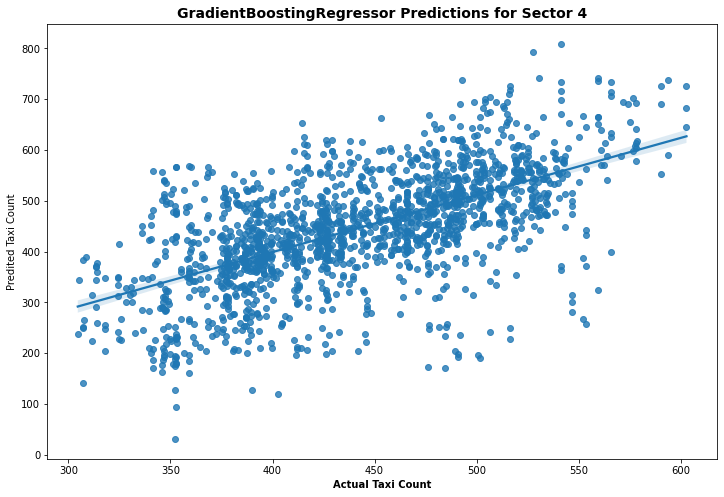

In [27]:
# Plot a scatter plot test dependent variables vs predictions
plt.figure(figsize = (12, 8))
sns.regplot(y=y_test,
            x=gb_reg_y_predict)
plt.title("GradientBoostingRegressor Predictions for Sector 4", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Actual Taxi Count", weight = "bold")
plt.ylabel("Predited Taxi Count")
plt.show()

Feature: 0, Score: 0.18959
Feature: 1, Score: 0.02632
Feature: 2, Score: 0.78409


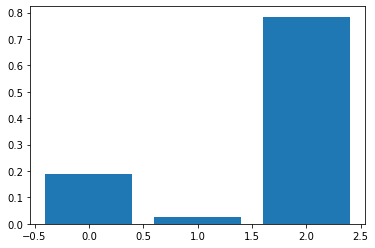

In [28]:
# Get importance
importance = gb_reg.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Sector 5

In [29]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y5, test_size = 0.2, random_state = 20)

# Dummy Regressor
dummy_reg = DummyRegressor()
dummy_reg.fit(x_train,y_train)
dummy_reg_y_predict = dummy_reg.predict(x_test)

# Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg_y_predict = lin_reg.predict(x_test)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_reg_y_predict = dt_reg.predict(x_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
rf_reg_y_predict = rf_reg.predict(x_test)

# Extra Trees Regressor
et_reg = ExtraTreesRegressor()
et_reg.fit(x_train,y_train)
et_reg_y_predict = et_reg.predict(x_test)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train,y_train)
gb_reg_y_predict = gb_reg.predict(x_test)

# AdaBoostRegressor
ab_reg = AdaBoostRegressor()
ab_reg.fit(x_train,y_train)
ab_reg_y_predict = ab_reg.predict(x_test)

# KNeighbors Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)
knn_reg_y_predict = knn_reg.predict(x_test)

In [30]:
# Print the RMSE between the y test and the prediction
dummy_reg_MSE  = mean_squared_error(y_test, dummy_reg_y_predict)
dummy_reg_RMSE = math.sqrt(dummy_reg_MSE)
print("Root Mean Square Error of Dummy Regressor:\n")
print(dummy_reg_RMSE, '\n')

lin_reg_MSE  = mean_squared_error(y_test, lin_reg_y_predict)
lin_reg_RMSE = math.sqrt(lin_reg_MSE)
print("Root Mean Square Error of Linear Regressor:\n")
print(lin_reg_RMSE, '\n')

dt_reg_MSE  = mean_squared_error(y_test, dt_reg_y_predict)
dt_reg_RMSE = math.sqrt(dt_reg_MSE)
print("Root Mean Square Error of Decision Tree Regressor:\n")
print(dt_reg_RMSE, '\n')

rf_reg_MSE  = mean_squared_error(y_test, rf_reg_y_predict)
rf_reg_RMSE = math.sqrt(rf_reg_MSE)
print("Root Mean Square Error of Random Forest Regressor:\n")
print(rf_reg_RMSE, '\n')

et_reg_MSE  = mean_squared_error(y_test, et_reg_y_predict)
et_reg_RMSE = math.sqrt(et_reg_MSE)
print("Root Mean Square Error of Extra Tree Regressor:\n")
print(et_reg_RMSE, '\n')

gb_reg_MSE  = mean_squared_error(y_test, gb_reg_y_predict)
gb_reg_RMSE = math.sqrt(gb_reg_MSE)
print("Root Mean Square Error of Gradient Boosting Regressor:\n")
print(gb_reg_RMSE, '\n')

ab_reg_MSE  = mean_squared_error(y_test, ab_reg_y_predict)
ab_reg_RMSE = math.sqrt(ab_reg_MSE)
print("Root Mean Square Error of AdaBoost Regressor:\n")
print(ab_reg_RMSE, '\n')

knn_reg_MSE  = mean_squared_error(y_test, knn_reg_y_predict)
knn_reg_RMSE = math.sqrt(knn_reg_MSE)
print("Root Mean Square Error of KNeighbors Regressor:\n")
print(knn_reg_RMSE, '\n')

Root Mean Square Error of Dummy Regressor:

551.6906921595765 

Root Mean Square Error of Linear Regressor:

531.0575703184467 

Root Mean Square Error of Decision Tree Regressor:

393.6939632941951 

Root Mean Square Error of Random Forest Regressor:

391.4463997831377 

Root Mean Square Error of Extra Tree Regressor:

393.68307889286814 

Root Mean Square Error of Gradient Boosting Regressor:

358.88792988807666 

Root Mean Square Error of AdaBoost Regressor:

440.315784234038 

Root Mean Square Error of KNeighbors Regressor:

394.95977843477476 



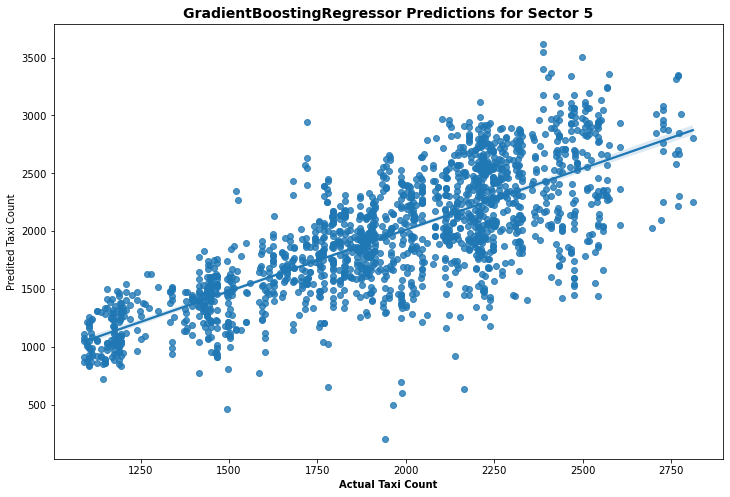

In [31]:
# Plot a scatter plot test dependent variables vs predictions
plt.figure(figsize = (12, 8))
sns.regplot(y=y_test,
            x=gb_reg_y_predict)
plt.title("GradientBoostingRegressor Predictions for Sector 5", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Actual Taxi Count", weight = "bold")
plt.ylabel("Predited Taxi Count")
plt.show()

Feature: 0, Score: 0.12197
Feature: 1, Score: 0.01148
Feature: 2, Score: 0.86655


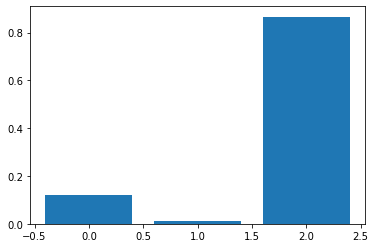

In [32]:
# Get importance
importance = gb_reg.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Sector 6

In [33]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y6, test_size = 0.2, random_state = 20)

# Dummy Regressor
dummy_reg = DummyRegressor()
dummy_reg.fit(x_train,y_train)
dummy_reg_y_predict = dummy_reg.predict(x_test)

# Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg_y_predict = lin_reg.predict(x_test)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_reg_y_predict = dt_reg.predict(x_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
rf_reg_y_predict = rf_reg.predict(x_test)

# Extra Trees Regressor
et_reg = ExtraTreesRegressor()
et_reg.fit(x_train,y_train)
et_reg_y_predict = et_reg.predict(x_test)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train,y_train)
gb_reg_y_predict = gb_reg.predict(x_test)

# AdaBoostRegressor
ab_reg = AdaBoostRegressor()
ab_reg.fit(x_train,y_train)
ab_reg_y_predict = ab_reg.predict(x_test)

# KNeighbors Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)
knn_reg_y_predict = knn_reg.predict(x_test)

In [34]:
# Print the RMSE between the y test and the prediction
dummy_reg_MSE  = mean_squared_error(y_test, dummy_reg_y_predict)
dummy_reg_RMSE = math.sqrt(dummy_reg_MSE)
print("Root Mean Square Error of Dummy Regressor:\n")
print(dummy_reg_RMSE, '\n')

lin_reg_MSE  = mean_squared_error(y_test, lin_reg_y_predict)
lin_reg_RMSE = math.sqrt(lin_reg_MSE)
print("Root Mean Square Error of Linear Regressor:\n")
print(lin_reg_RMSE, '\n')

dt_reg_MSE  = mean_squared_error(y_test, dt_reg_y_predict)
dt_reg_RMSE = math.sqrt(dt_reg_MSE)
print("Root Mean Square Error of Decision Tree Regressor:\n")
print(dt_reg_RMSE, '\n')

rf_reg_MSE  = mean_squared_error(y_test, rf_reg_y_predict)
rf_reg_RMSE = math.sqrt(rf_reg_MSE)
print("Root Mean Square Error of Random Forest Regressor:\n")
print(rf_reg_RMSE, '\n')

et_reg_MSE  = mean_squared_error(y_test, et_reg_y_predict)
et_reg_RMSE = math.sqrt(et_reg_MSE)
print("Root Mean Square Error of Extra Tree Regressor:\n")
print(et_reg_RMSE, '\n')

gb_reg_MSE  = mean_squared_error(y_test, gb_reg_y_predict)
gb_reg_RMSE = math.sqrt(gb_reg_MSE)
print("Root Mean Square Error of Gradient Boosting Regressor:\n")
print(gb_reg_RMSE, '\n')

ab_reg_MSE  = mean_squared_error(y_test, ab_reg_y_predict)
ab_reg_RMSE = math.sqrt(ab_reg_MSE)
print("Root Mean Square Error of AdaBoost Regressor:\n")
print(ab_reg_RMSE, '\n')

knn_reg_MSE  = mean_squared_error(y_test, knn_reg_y_predict)
knn_reg_RMSE = math.sqrt(knn_reg_MSE)
print("Root Mean Square Error of KNeighbors Regressor:\n")
print(knn_reg_RMSE, '\n')

Root Mean Square Error of Dummy Regressor:

165.3317600193194 

Root Mean Square Error of Linear Regressor:

149.18332769124518 

Root Mean Square Error of Decision Tree Regressor:

118.39881397757955 

Root Mean Square Error of Random Forest Regressor:

117.11771243560769 

Root Mean Square Error of Extra Tree Regressor:

118.39743203240127 

Root Mean Square Error of Gradient Boosting Regressor:

104.12805927408579 

Root Mean Square Error of AdaBoost Regressor:

129.86857008247694 

Root Mean Square Error of KNeighbors Regressor:

117.46393738961108 



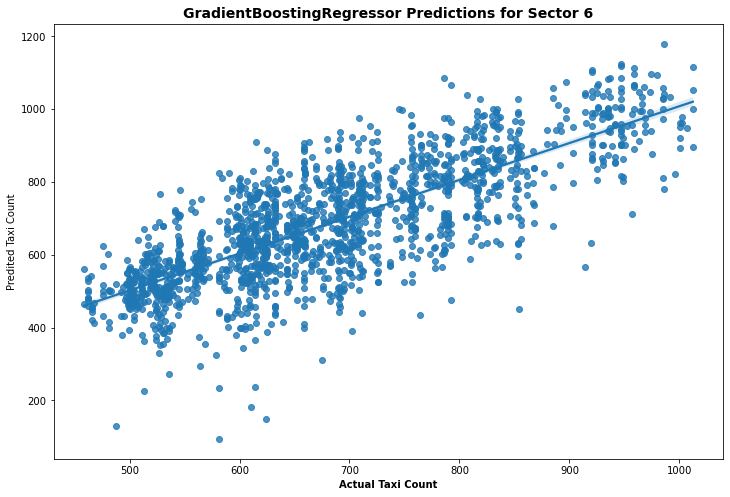

In [35]:
# Plot a scatter plot test dependent variables vs predictions
plt.figure(figsize = (12, 8))
sns.regplot(y=y_test,
            x=gb_reg_y_predict)
plt.title("GradientBoostingRegressor Predictions for Sector 6", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Actual Taxi Count", weight = "bold")
plt.ylabel("Predited Taxi Count")
plt.show()

Feature: 0, Score: 0.03807
Feature: 1, Score: 0.02098
Feature: 2, Score: 0.94095


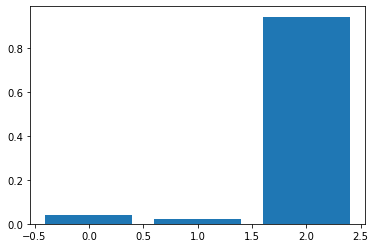

In [36]:
# Get importance
importance = gb_reg.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Sector 8

In [37]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y8, test_size = 0.2, random_state = 20)

# Dummy Regressor
dummy_reg = DummyRegressor()
dummy_reg.fit(x_train,y_train)
dummy_reg_y_predict = dummy_reg.predict(x_test)

# Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg_y_predict = lin_reg.predict(x_test)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_reg_y_predict = dt_reg.predict(x_test)

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
rf_reg_y_predict = rf_reg.predict(x_test)

# Extra Trees Regressor
et_reg = ExtraTreesRegressor()
et_reg.fit(x_train,y_train)
et_reg_y_predict = et_reg.predict(x_test)

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train,y_train)
gb_reg_y_predict = gb_reg.predict(x_test)

# AdaBoostRegressor
ab_reg = AdaBoostRegressor()
ab_reg.fit(x_train,y_train)
ab_reg_y_predict = ab_reg.predict(x_test)

# KNeighbors Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)
knn_reg_y_predict = knn_reg.predict(x_test)

In [38]:
# Print the RMSE between the y test and the prediction
dummy_reg_MSE  = mean_squared_error(y_test, dummy_reg_y_predict)
dummy_reg_RMSE = math.sqrt(dummy_reg_MSE)
print("Root Mean Square Error of Dummy Regressor:\n")
print(dummy_reg_RMSE, '\n')

lin_reg_MSE  = mean_squared_error(y_test, lin_reg_y_predict)
lin_reg_RMSE = math.sqrt(lin_reg_MSE)
print("Root Mean Square Error of Linear Regressor:\n")
print(lin_reg_RMSE, '\n')

dt_reg_MSE  = mean_squared_error(y_test, dt_reg_y_predict)
dt_reg_RMSE = math.sqrt(dt_reg_MSE)
print("Root Mean Square Error of Decision Tree Regressor:\n")
print(dt_reg_RMSE, '\n')

rf_reg_MSE  = mean_squared_error(y_test, rf_reg_y_predict)
rf_reg_RMSE = math.sqrt(rf_reg_MSE)
print("Root Mean Square Error of Random Forest Regressor:\n")
print(rf_reg_RMSE, '\n')

et_reg_MSE  = mean_squared_error(y_test, et_reg_y_predict)
et_reg_RMSE = math.sqrt(et_reg_MSE)
print("Root Mean Square Error of Extra Tree Regressor:\n")
print(et_reg_RMSE, '\n')

gb_reg_MSE  = mean_squared_error(y_test, gb_reg_y_predict)
gb_reg_RMSE = math.sqrt(gb_reg_MSE)
print("Root Mean Square Error of Gradient Boosting Regressor:\n")
print(gb_reg_RMSE, '\n')

ab_reg_MSE  = mean_squared_error(y_test, ab_reg_y_predict)
ab_reg_RMSE = math.sqrt(ab_reg_MSE)
print("Root Mean Square Error of AdaBoost Regressor:\n")
print(ab_reg_RMSE, '\n')

knn_reg_MSE  = mean_squared_error(y_test, knn_reg_y_predict)
knn_reg_RMSE = math.sqrt(knn_reg_MSE)
print("Root Mean Square Error of KNeighbors Regressor:\n")
print(knn_reg_RMSE, '\n')

Root Mean Square Error of Dummy Regressor:

13.445123877504292 

Root Mean Square Error of Linear Regressor:

12.817594588159915 

Root Mean Square Error of Decision Tree Regressor:

9.862882014373742 

Root Mean Square Error of Random Forest Regressor:

9.744925675620605 

Root Mean Square Error of Extra Tree Regressor:

9.862579121205457 

Root Mean Square Error of Gradient Boosting Regressor:

8.654621232801867 

Root Mean Square Error of AdaBoost Regressor:

9.801673120689713 

Root Mean Square Error of KNeighbors Regressor:

9.912376737194846 



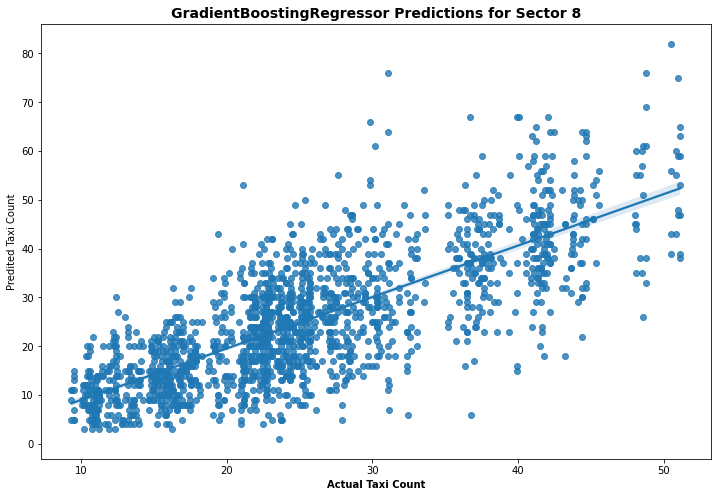

In [39]:
# Plot a scatter plot test dependent variables vs predictions
plt.figure(figsize = (12, 8))
sns.regplot(y=y_test,
            x=gb_reg_y_predict)
plt.title("GradientBoostingRegressor Predictions for Sector 8", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Actual Taxi Count", weight = "bold")
plt.ylabel("Predited Taxi Count")
plt.show()

Feature: 0, Score: 0.21961
Feature: 1, Score: 0.01355
Feature: 2, Score: 0.76684


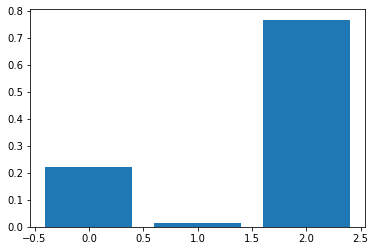

In [40]:
# Get importance
importance = gb_reg.feature_importances_

# Summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Generally, the lower the RMSE, the better. However, the RMSE should be one order of magnitude lower than the values. For example, if values are between 200-500, a good RMSE would be around 10% of the values.

<strong>For all sectors excluding sectors 7 and 9:</strong>

From the RMSE, Gradient Boosting Regressor gives the lowest score. Thus, it is the best model. 

Sector 1's RMSE:  27.399
<br>
Sector 2's RMSE: 118.567
<br>
Sector 3's RMSE:  14.626
<br>
Sector 4's RMSE:  88.755
<br>
Sector 5's RMSE: 358.888
<br>
Sector 6's RMSE: 104.128
<br>
Sector 8's RMSE:   8.655

Plotting the results in a scatter plot, it is visible that there is a strong positive correlation between the predicted values and the actual values of the test data.

This demonstrates that the visual inspection of predicted values vs actual values using a plot is useful. 

In terms of feature importance, hour is the most important feature to predict model success, followed by day of week and minute.


# The end
And that's the end! To recap the accomplishments:
1. Independently collected data from an official government website
2. Performed data cleaning
3. Engineered new features
4. Trained a machine learning model to predict taxi availability 

Successfully implemented machine learning in predicting taxi availability in different sectors in Singapore. 